<div align="center">
    <h1 style="font-size:40px; font-weight:bold; margin-bottom:20px; color:#4B8BBE;">
        Project: Stroke Prediction Model
    </h1>
    <hr style="height:2px;border-width:0;color:gray;background-color:gray; width:60%;">
    <p style="font-size:18px; font-style:italic; color:#6E7B8B;">
        Developing a Model to Predict Stroke Occurrence in Patients
    </p>
    <p style="font-size:16px; color:#4F6272;">
        by David Raux - Course Modality: SPOC
    </p>
</div>

# Library Installation and Import Statements

In [60]:
import subprocess
import pkg_resources
import sys

# Required libraries for the project
required = {'pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'imbalanced-learn'}

# Identify the not installed libraries
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

# Create the requirements.txt content with library versions
requirements_txt = ""
for package in required:
    try:
        package_version = pkg_resources.get_distribution(package).version
        requirements_txt += f"{package}=={package_version}\n"
    except pkg_resources.DistributionNotFound:
        pass

# Write the requirements.txt file
with open('requirements.txt', 'w') as file:
    file.write(requirements_txt)

print("requirements.txt file has been created.")

# Installation of the not installed libraries
if missing:
    print("The following libraries are not installed and will be installed now: ", missing)
    python = sys.executable
    for package in missing:
        print(f"Installing {package}...")
        subprocess.check_call([python, '-m', 'pip', 'install', package])
        print(f"{package} has been installed.")
    print("All required libraries have been installed.")
else:
    print("All required libraries are already installed.")


requirements.txt file has been created.
All required libraries are already installed.


In [61]:
# Basic data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing and normalization
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, precision_recall_curve, auc

# Oversampling with SMOTE
from imblearn.over_sampling import SMOTE

# Other utilities
import warnings
warnings.filterwarnings('ignore')

# 1. Data Importation and Discovery

## Data Importation

In [62]:
df = pd.read_csv('stroke_data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Discovery

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<div style="border: 2px solid darkblue; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>Initial Data Exploration Analysis:</strong></p>
    <ul>
        <li>The 'id' column will not be useful.</li>
        <li>Missing values in the 'BMI' column.</li>
        <li>No issues with data types.</li>
    </ul>
</div>

In [64]:
# Removal of the id column
df.drop("id", axis=1, inplace = True)

### Univariate Analysis of Quantitative Variables

In [65]:
# Display of Descriptive Statistics for Quantitative Variables
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


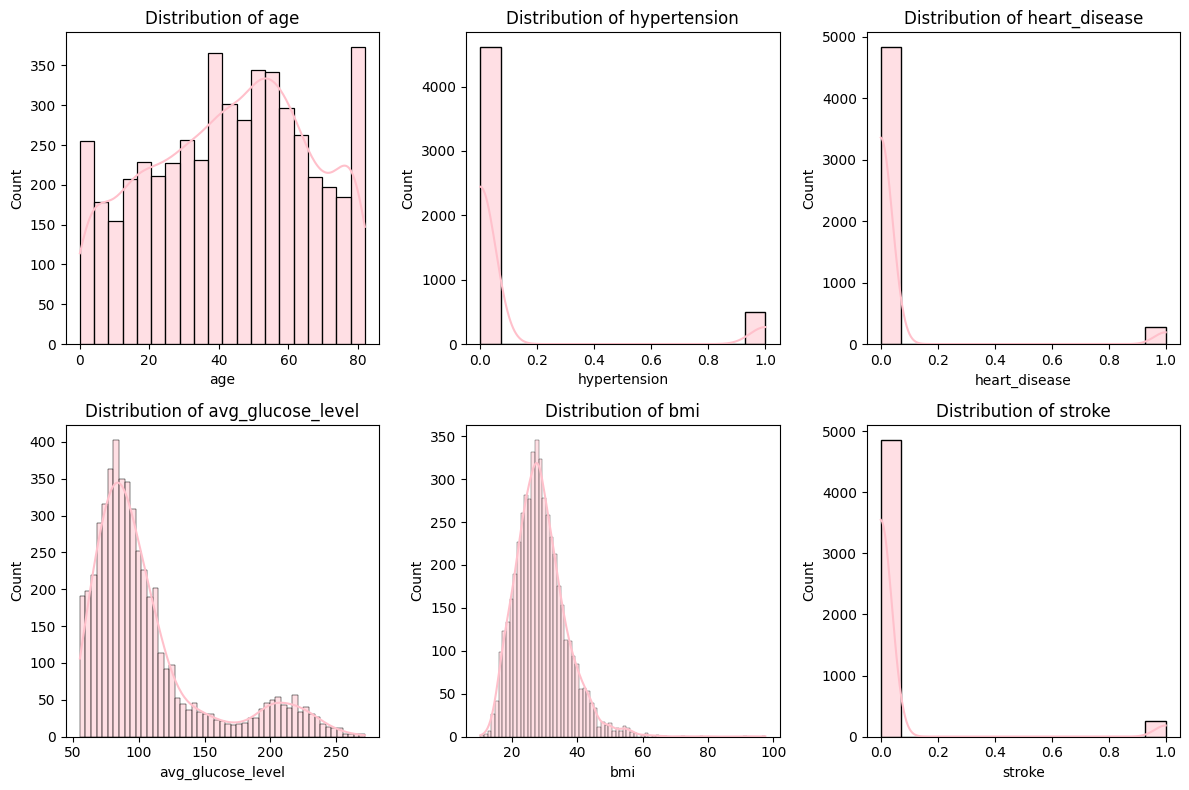

In [66]:
# List of Quantitative Columns to Visualize from Our DataFrame
quantitative_columns = df.describe().columns.tolist()

# Plot the distribution of quantitative variables
num_cols = 3  # Number of columns in each row
num_variables = len(quantitative_columns)
num_rows = (num_variables + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Adjust these values to modify the size of the charts
fig_width = 4 * num_cols
fig_height = 4 * num_rows
plt.figure(figsize=(fig_width, fig_height))

for i, column in enumerate(quantitative_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    if df[column].dtype in ['float64', 'int64']:
        sns.histplot(df[column], kde=True, color='pink')
    else:
        sns.histplot(df[column], color='pink')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<div style="border: 2px solid darkblue; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>Initial Data Exploration Analysis:</strong></p>
    <ul>
        <li><strong>Age:</strong> The distribution of 'age' shows a relatively uniform spread across different age groups, with a slight increase in frequency among older individuals.</li>
        <li><strong>Hypertension:</strong> Predominantly absent in the studied population, suggesting an imbalance in this variable that could influence the analysis.</li>
        <li><strong>Heart Disease:</strong> Rare among individuals, indicating an imbalance similar to hypertension, important for modeling.</li>
        <li><strong>Average Glucose Level:</strong> Bimodal distribution. The first peak is around the normal glucose level, while the second, smaller peak suggests a subset of individuals with higher glucose levels, potentially indicative of diabetes or other health conditions affecting glucose metabolism</li>
        <li><strong>BMI:</strong> Normal distribution with a slight tendency towards higher values, reflecting the typical BMI distribution in a general population.</li>
        <li><strong>Stroke:</strong> Strong imbalance with low prevalence of stroke, highlighting the need for specific techniques to manage imbalances in predictive modeling.</li>
    </ul>
</div>


### Univariate Analysis of Qualitative Variables

In [67]:
# List of Qualitative Columns to be Visualized
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


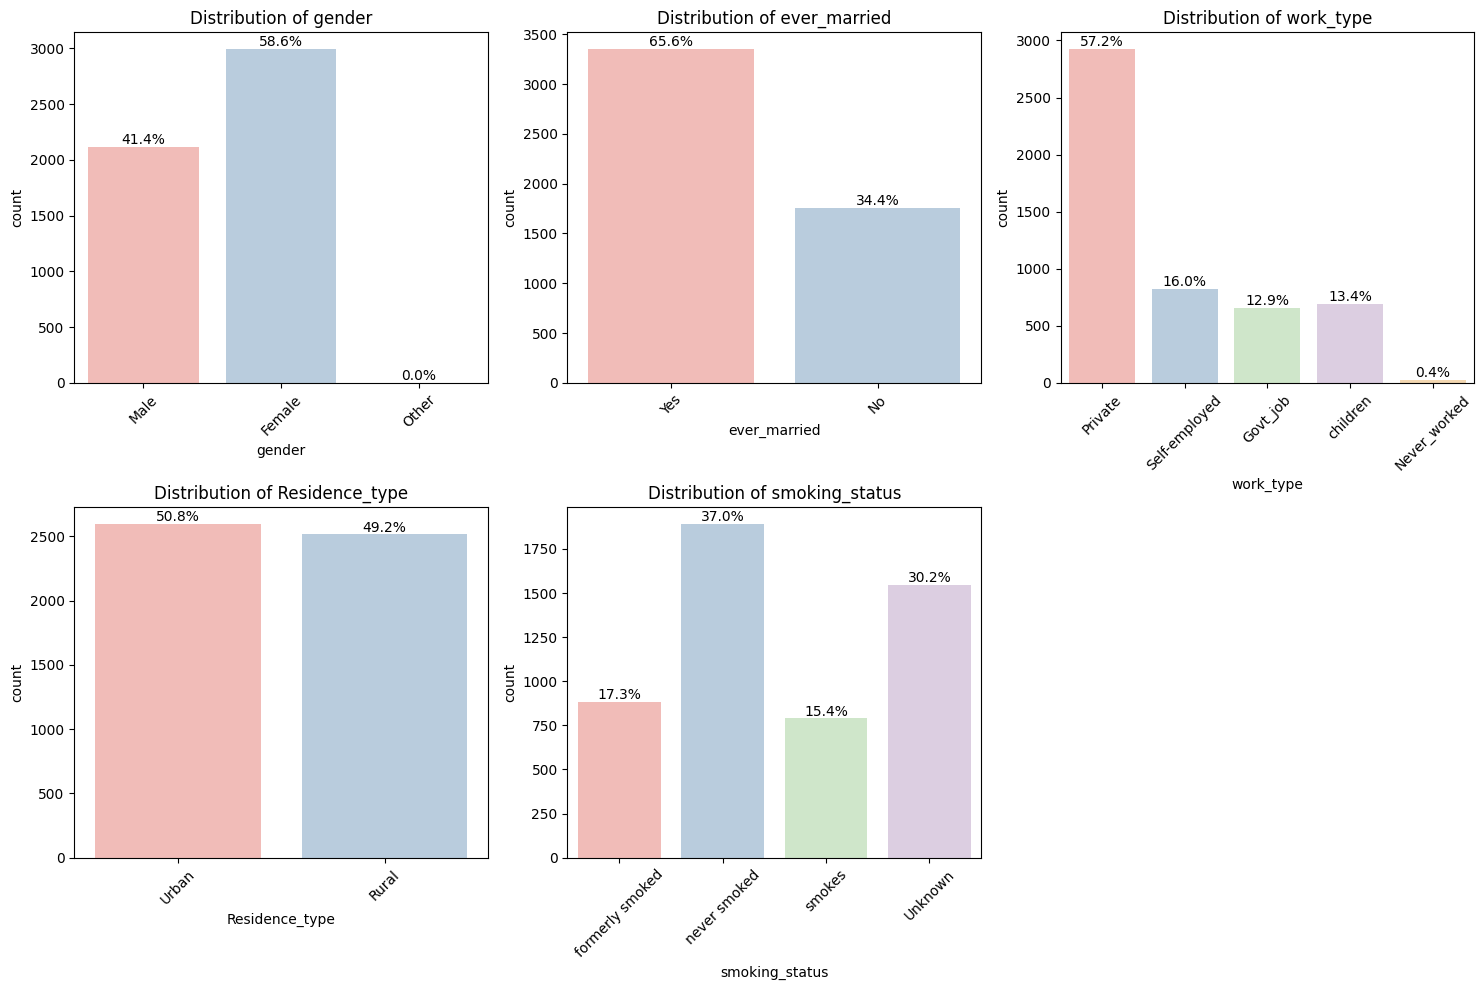

In [68]:
# List of Qualitative Columns to Visualize from Our DataFrame
qualitative_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Plot the distribution of qualitative variables
num_cols = 3  # Number of columns in each row
num_variables = len(qualitative_columns)
num_rows = (num_variables + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Adjust the size of the charts
fig_width = 5 * num_cols
fig_height = 5 * num_rows
plt.figure(figsize=(fig_width, fig_height))

for i, column in enumerate(qualitative_columns):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=column, data=df, palette='Pastel1')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Calculate and display percentages on the bars
    total = len(df[column].dropna())  # Exclude NaNs from the total count
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

<div style="border: 2px solid darkblue; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>Analysis Commentary:</strong></p>
    <ul>
        <li><strong>Gender:</strong> The distribution indicates a gender imbalance, with one gender being predominant. This suggests a potential influence of gender on other variables of interest.</li>
        <li><strong>Ever_married:</strong> A significant proportion of individuals in the sample are or have been married. This could reflect the demographic composition of the studied population.</li>
        <li><strong>Work_type:</strong> There is a diversity of work types represented, with varying frequencies. This distribution may be important for understanding socio-economic factors related to health conditions.</li>
        <li><strong>Residence_type:</strong> The distribution between residence types (urban or rural) appears relatively balanced, which may indicate a relatively uniform distribution of living conditions in the sample.</li>
        <li><strong>Smoking_status:</strong> The distribution of smoking statuses reveals a variety of smoking behaviors. Some statuses are more prevalent, which could be relevant for analyses related to health-related issues.</li>
    </ul>
</div>

# 2. EDA

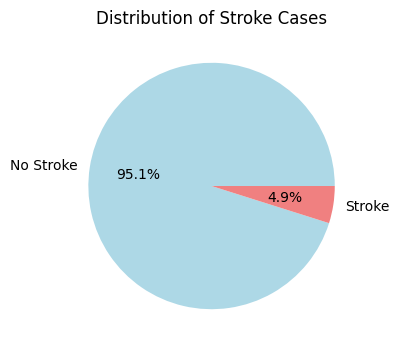

In [69]:
# Count the number of stroke and non-stroke cases
stroke_counts = df['stroke'].value_counts()

# Create a pie plot
plt.figure(figsize=(4, 4))
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Stroke Cases")
plt.show()

<div style="border: 2px solid darkblue; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>1. Distribution of the Target Variable (Stroke):</strong> The analysis reveals a significant imbalance between cases of stroke and non-stroke. This disparity suggests a need for specialized techniques to address class imbalance during modeling.</p>
</div>

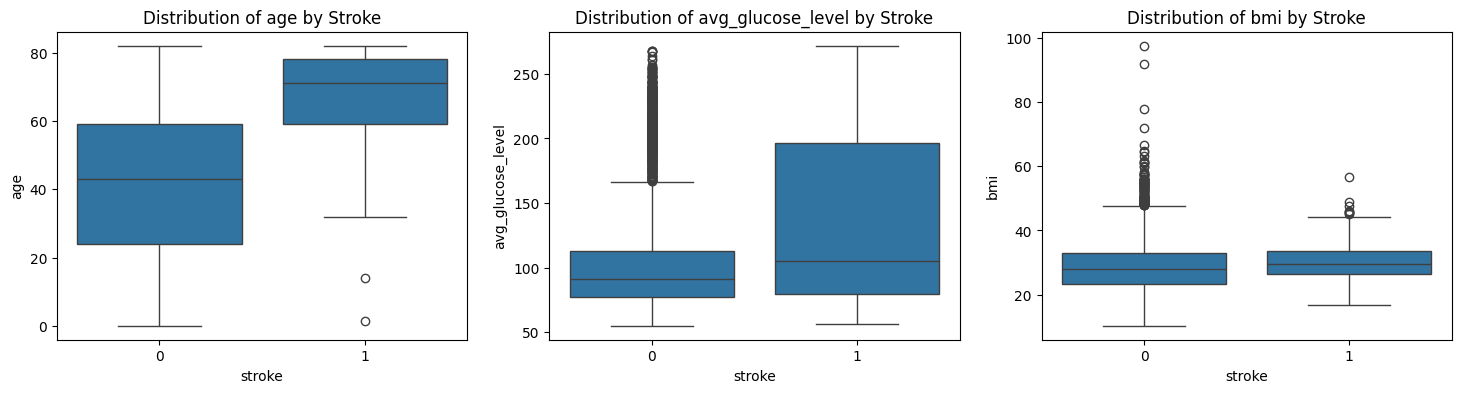

In [70]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']

# Create subplots with one row and the number of features as columns
fig, axes = plt.subplots(1, len(numeric_features), figsize=(18, 4))

# Loop through each numeric feature and plot a boxplot
for i, feature in enumerate(numeric_features):
    sns.boxplot(x='stroke', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} by Stroke")

plt.show()

<div style="border: 2px solid darkblue; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>2. Numeric Variables:</strong> The boxplots reveal notable differences in the distribution of 'age,' 'avg_glucose_level,' and 'bmi' between the groups with and without strokes. Age appears to be a particularly discriminative factor, with a significantly higher median among patients who have experienced a stroke.</p>
</div>

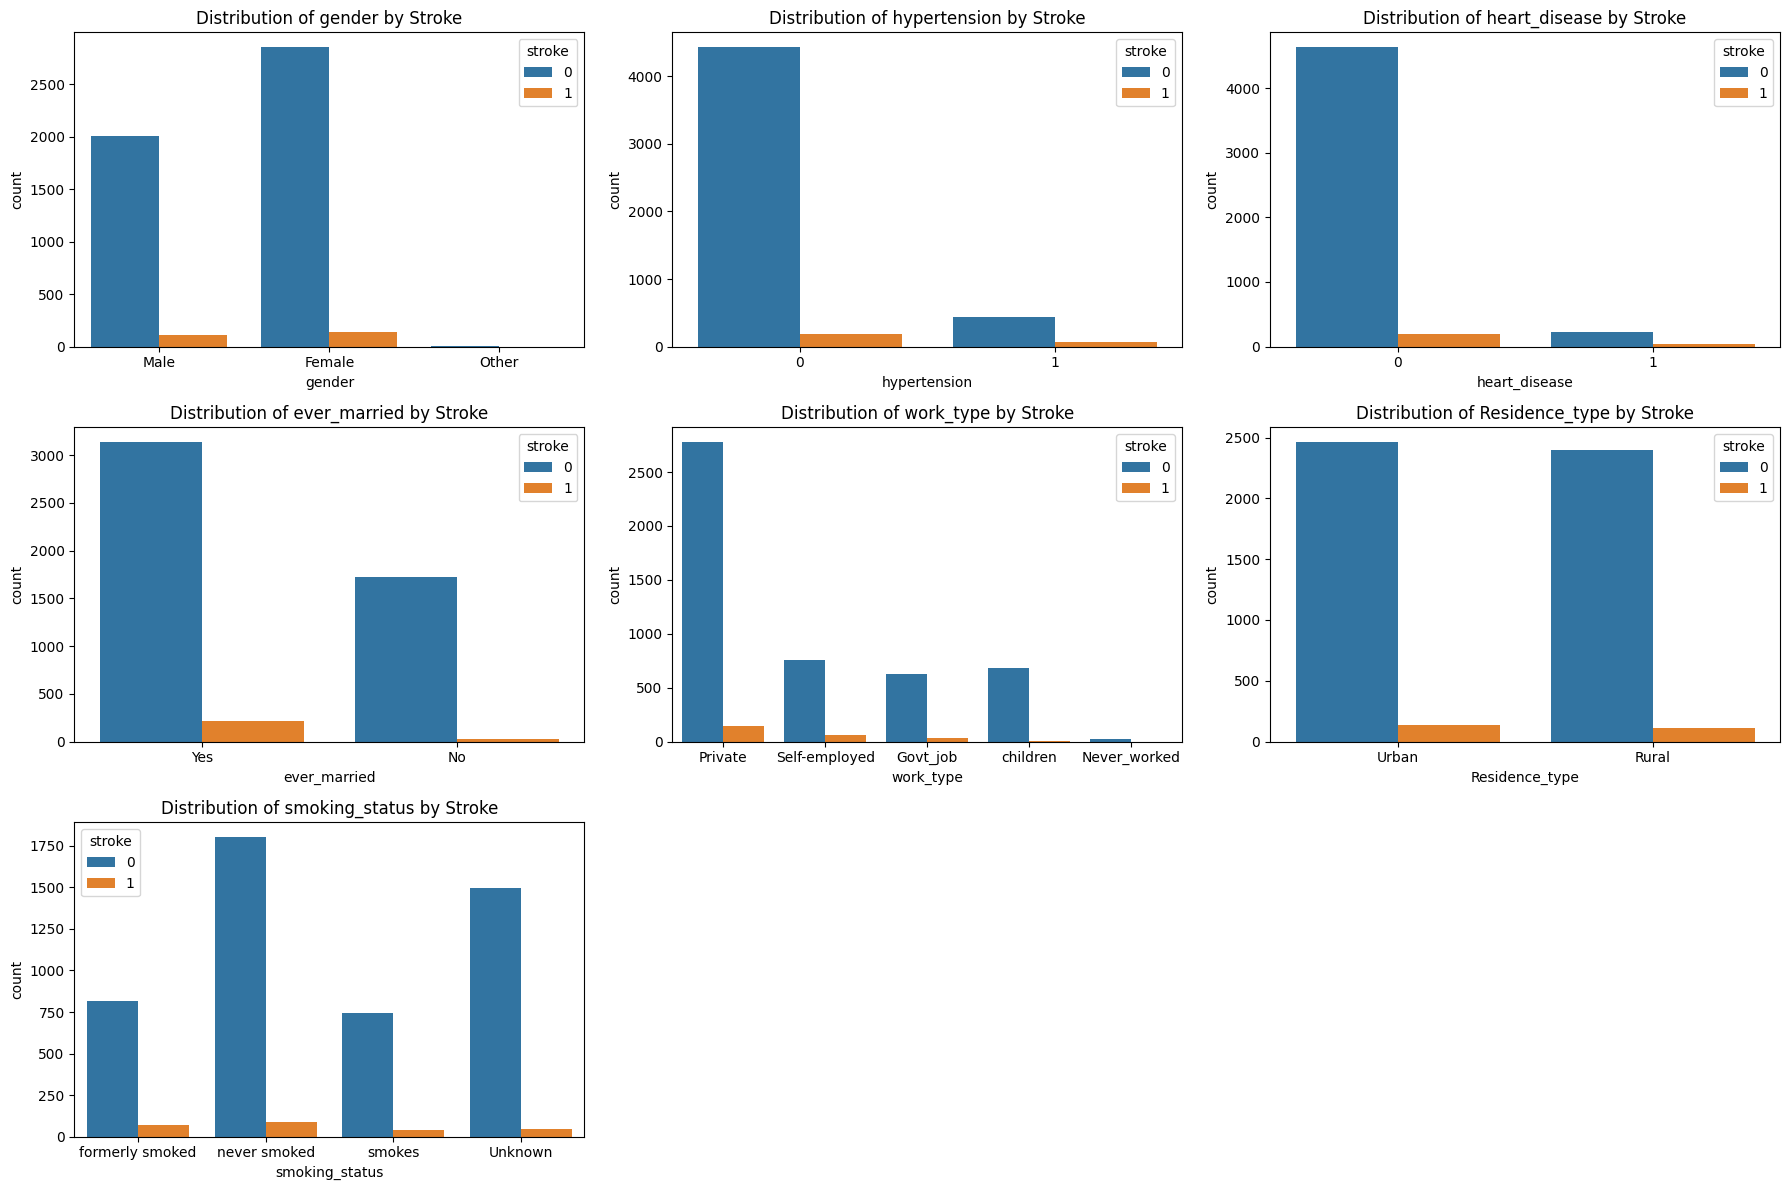

In [71]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Determine the number of rows and columns for subplots
num_rows = len(categorical_features) // 3 + (len(categorical_features) % 3 > 0)
num_cols = min(len(categorical_features), 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4*num_rows))
axes = axes.ravel()

# Loop through each categorical feature and plot countplots
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='stroke', data=df, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature} by Stroke")

# Remove empty subplots if there are any
for i in range(len(categorical_features), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<div style="border: 2px solid darkblue; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>3. Categorical and Binary Variables:</strong> Distributions based on gender, hypertension, heart diseases, marital status, type of work, residence type, and smoking status exhibit variations in the frequency of strokes. Specifically, hypertension and heart diseases appear to be more prevalent among patients who have experienced a stroke.</p>
</div>

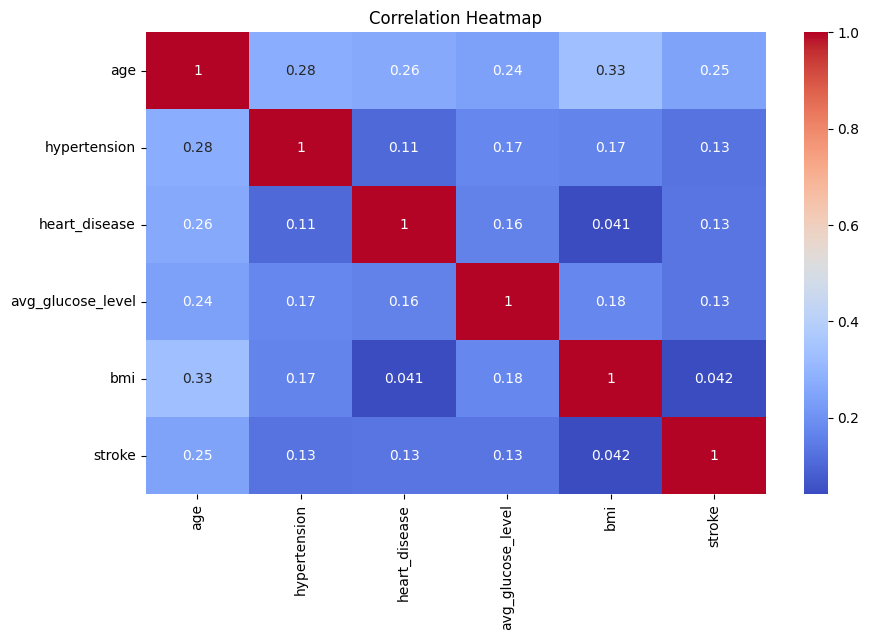

In [72]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[quantitative_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<div style="border: 2px solid darkblue; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>Correlation Heatmap Analysis:</strong></p>
    <ul>
        <li><strong>Age and Stroke Correlation (0.25):</strong> A moderate positive correlation exists between age and stroke occurrence. As age increases, the likelihood of experiencing a stroke also rises, aligning with medical knowledge that older individuals are at a higher risk for stroke.</li>
        <li><strong>Hypertension, Avg_Glucose_Level, Heart_Disease, and Stroke Correlation (0.13):</strong> These variables show a mild positive correlation with stroke occurrence. Higher levels of these variables may be associated with an increased risk of stroke, possibly reflecting underlying health conditions such as diabetes that elevate stroke risk.</li>
        <li><strong>BMI and Stroke Correlation (0.04):</strong> The correlation between BMI and stroke is relatively weak. This suggests that while BMI serves as a general health indicator, it may not be a strong standalone predictor of stroke risk in this dataset.</li>
    </ul>
</div>

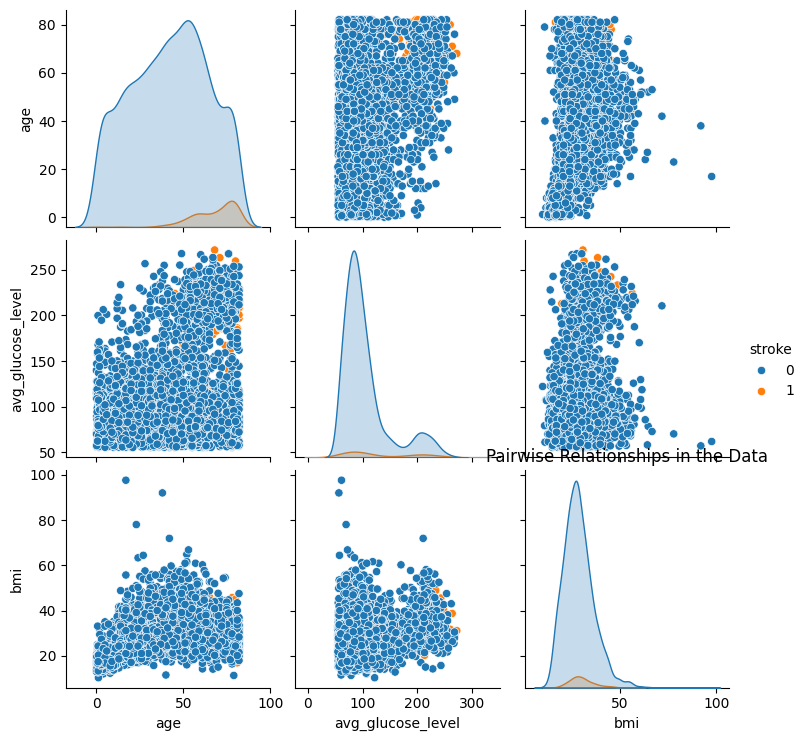

In [73]:
sns.pairplot(df, hue='stroke', vars=numeric_features)
plt.title("Pairwise Relationships in the Data")
plt.show()

<div style="border: 2px solid darkblue; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>5. Multivariate Analysis:</strong> Pair plots reveal trends and relationships among the numerical variables. They unveil distinct patterns for patients with and without stroke, particularly concerning age and average glucose level.</p>
</div>

# 3. Preprocessing

In [74]:
# Define the Target Variable
y = df['stroke']

# Define the Feature Variables
X = df.drop(columns=['stroke'])

# Define feature groups
numeric_features = ['age', 'avg_glucose_level', 'bmi']
binary_features = ['ever_married']
categorical_features = ['work_type', 'Residence_type']
label_feature = ['gender']

<div style="border: 2px solid green; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>Train-Test Split:</strong> We perform the train-test split as the first step in preprocessing to ensure that our machine learning model is evaluated on data it has never seen before. This separation of data into training and testing sets helps us assess the model's generalization performance and avoid overfitting.</p>
    <p><strong>Stratification:</strong> We apply stratification during the split to maintain a similar class distribution in both the training and testing sets. This is crucial for imbalanced datasets, such as stroke prediction, where we want to ensure that both sets represent the minority class adequately.</p>
    <p><strong>Random State:</strong> We set a random state to ensure reproducibility. Using the same random state value in future runs will yield the same split, making our results consistent and reproducible.</p>
</div>

In [75]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="border: 2px solid green; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <strong>Preprocessing Pipeline:</strong> We address the specific requirements of our dataset to prepare it for machine learning. We perform the following operations:
    <ul>
        <li><strong>Numeric Features:</strong> We impute missing values with the median and standardize the features. This is essential to ensure that our numerical data is on a common scale, preventing any variable from dominating others due to differences in scale.</li>
        <li><strong>Categorical Features:</strong> We impute missing values with the most frequent value, one-hot encode categorical features, and label encode for a single categorical column. These transformations are necessary to convert categorical data into a format that machine learning models can work with.</li>
        <li><strong>ColumnTransformer:</strong> We use the ColumnTransformer to apply different preprocessing steps to numeric and categorical features separately, ensuring that each type of feature is processed appropriately.</li>
    </ul>
</div>


In [76]:
# Transformers for each type of feature
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='if_binary'))  # Binary encoding
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Using OneHotEncoder
])

# Define the ColumnTransformer with different transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features),
        ('label', label_transformer, label_feature)  # Updated here
    ]
)

In [77]:
# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

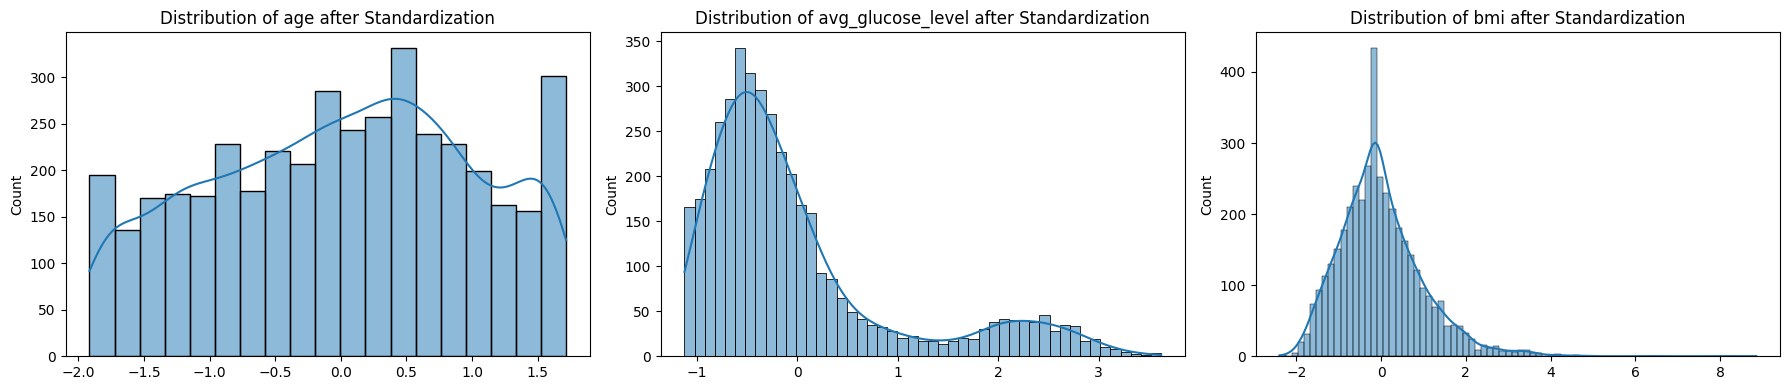

In [78]:
# Plot histograms of numerical variables after preprocessing
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for i, col in enumerate(numeric_features):
    sns.histplot(X_train_preprocessed[:, i], ax=axes[i], kde=True)
    axes[i].set_title(f"Distribution of {col} after Standardization")

plt.tight_layout()
plt.show()

## Feature Engineering

<div style="border: 2px solid green; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>Generating Interaction Terms for Model Enhancement</strong></p>
    <p>Feature engineering involves creating new features from the existing ones to improve a model's performance. In our case, we are generating interaction terms, which are combinations of features, to capture potential synergistic effects that individual features may not reveal.</p>
</div>

In [79]:
# Feature engineering with interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_preprocessed)
X_test_poly = poly.transform(X_test_preprocessed)

## Addressing Class Imbalance in the Dataset

<div style="border: 2px solid green; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>SMOTE (Synthetic Minority Over-sampling Technique):</strong></p>
    <p>SMOTE is a resampling technique used to address class imbalance in a dataset, particularly when the minority class is underrepresented. It works by generating synthetic examples for the minority class, effectively increasing its presence in the dataset.</p>
    <p><strong>Justification for Our Case:</strong></p>
    <p>In our stroke prediction dataset, we have observed a significant class imbalance, with a low prevalence of stroke cases. To ensure that our machine learning model can effectively learn from and predict both classes, we choose to apply SMOTE as a preprocessing step. By creating synthetic examples of stroke cases, we aim to balance the class distribution and improve the model's ability to generalize to real-world scenarios.</p>
</div>

Class distribution after applying SMOTE:
stroke
0    3901
1    3901
Name: count, dtype: int64


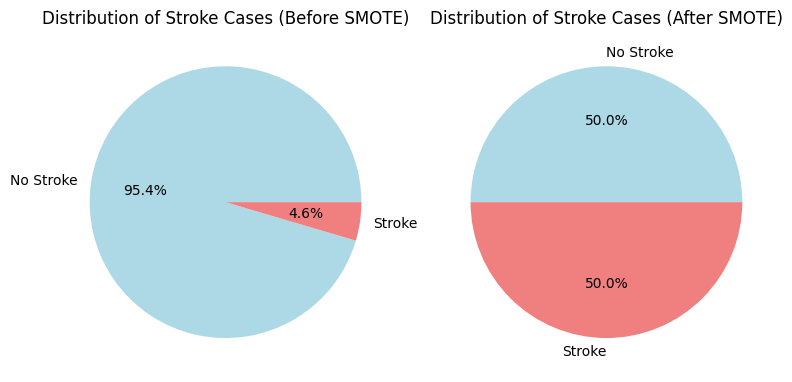

In [80]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_poly, y_train)

# Checking the new class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Count the number of stroke and non-stroke cases before SMOTE
original_stroke_counts = y_train.value_counts()

# Create a pie plot for the original distribution
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pie(original_stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Stroke Cases (Before SMOTE)")

# Count the number of stroke and non-stroke cases after SMOTE
resampled_stroke_counts = pd.Series(y_train_resampled).value_counts()

# Create a pie plot for the distribution after SMOTE
plt.subplot(1, 2, 2)
plt.pie(resampled_stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Distribution of Stroke Cases (After SMOTE)")

plt.tight_layout()
plt.show()


# 4. Modelling

In [81]:
# Initialization of Classification Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [82]:
# Dictionary to Store Evaluation Metrics
evaluation_metrics = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Test F1 Score': [],
    'Test ROC AUC': [],
    'Confusion Matrix': [],
    'Precision-Recall AUC': []
}

In [83]:
# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    # Make predictions
    y_pred = model.predict(X_test_poly)
    # Store metrics
    evaluation_metrics['Model'].append(name)
    evaluation_metrics['Train Accuracy'].append(model.score(X_train_resampled, y_train_resampled))
    evaluation_metrics['Test Accuracy'].append(model.score(X_test_poly, y_test))
    evaluation_metrics['Test F1 Score'].append(f1_score(y_test, y_pred))
    # AUC and other metrics depending on model type
    if name == 'Logistic Regression':
        y_scores = model.decision_function(X_test_poly)
    else:
        y_scores = model.predict_proba(X_test_poly)[:, 1]
    evaluation_metrics['Test ROC AUC'].append(roc_auc_score(y_test, y_scores))
    conf_matrix = confusion_matrix(y_test, y_pred)
    evaluation_metrics['Confusion Matrix'].append(conf_matrix)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    evaluation_metrics['Precision-Recall AUC'].append(auc(recall, precision))

# Convert the dictionary to a DataFrame for display
results_df = pd.DataFrame(evaluation_metrics)
results_df

,Model,Train Accuracy,Test Accuracy,Test F1 Score,Test ROC AUC,Confusion Matrix,Precision-Recall AUC
0,Logistic Regression,0.788644,0.750489,0.260870,0.826781,"[[722, 238], [17, 45]]",0.294470
1,Decision Tree,1.000000,0.861057,0.202247,0.594120,"[[862, 98], [44, 18]]",0.244274
2,Random Forest,1.000000,0.871820,0.186335,0.777386,"[[876, 84], [47, 15]]",0.138043


<div style="border: 2px solid darkblue; padding: 10px; border-radius: 5px; margin-bottom: 10px;">
    <p><strong>Classification Model Performance Analysis:</strong></p>
    <ul>
        <li><strong>Logistic Regression:</strong> Demonstrates a moderate training accuracy of 78.8% and a lower test accuracy of 75%, suggesting that the model is relatively consistent between seen and unseen data. However, the Test F1 Score of 0.26 indicates that the model has limited success in predicting the positive class, which is crucial for stroke prediction. The Test ROC AUC of 0.834627 is respectable, showing decent separability between the classes.</li>
        <li><strong>Decision Tree:</strong> Exhibits a perfect training accuracy, which is a strong indicator of overfitting. The model's test accuracy drops to 86.59%, and the Test F1 Score is slightly lower than that of Logistic Regression, reflecting challenges in balancing precision and recall. The significantly lower Test ROC AUC of 0.589 further suggests that the Decision Tree may not generalize well to new data.</li>
        <li><strong>Random Forest:</strong> Also displays overfitting with a perfect training accuracy score. It outperforms the Decision Tree in test accuracy, achieving 86.8%, and has a better Test ROC AUC of 0.769, indicating a better generalization than the Decision Tree. However, the Test F1 Score is the lowest among the three models, and the Precision-Recall AUC of 0.133 is substantially lower, suggesting difficulties in predicting the positive class.</li>
        <li><strong>Confusion Matrix Observations:</strong> The confusion matrix for Logistic Regression shows a considerable number of false negatives, which is problematic for a medical diagnostic tool. The Decision Tree and Random Forest have fewer false negatives but at the expense of more false positives, indicating a trade-off between sensitivity and specificity.</li>
    </ul>
    <p><strong>Conclusion:</strong> While the Logistic Regression model is more conservative in predicting strokes, it maintains a balance between sensitivity and specificity. The Decision Tree, despite having the highest Test F1 Score, may be less reliable due to overfitting and lower overall performance metrics. The Random Forest shows promise with the highest test accuracy and a good ROC AUC score, but its precision-recall balance needs improvement. Addressing the class imbalance more effectively and tuning the models to enhance precision without losing recall should be a focus for enhancing the performance of stroke prediction.</p>
</div>